# Unsupervised Learning for Fraud Detection

In this video, we will walk through a comprehensive process of applying unsupervised machine learning alogrithms using real-life data. We will train test and evaluate the following algorithms:

1. K-Means 
2. DBSCAN
3. Isolation Forest
4. Local Outlier Factor

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Import the dataset

In [2]:
# Load data into pandas DataFrame
df = pd.read_csv('C:/Users/Amarkou/Documents/Ecourse/creditcard.csv')
# Select the first 30,000 rows of the DataFrame
df = df.head(30000)

## Split data into training and testing sets

In [3]:
# Prepare data
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Unsupervised Learning Modelling Process

## Define hyperparameters to tune for each algorithm and Train and Test the models

In [4]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.5, min_samples=5)
isolation_forest = IsolationForest(n_estimators=100, max_samples="auto", contamination="auto", random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination="auto")
#autoencoder = None # to be defined later
#ocsvm = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)

# Hyperparameter tuning for k-means
kmeans_params = {"n_clusters": [2, 3, 4, 5, 6]}
kmeans_grid = GridSearchCV(estimator=kmeans, param_grid=kmeans_params, cv=5)
kmeans_grid.fit(X_train_scaled)
best_kmeans = kmeans_grid.best_estimator_

# Hyperparameter tuning for DBSCAN
dbscan_params = {"eps": [0.1, 0.5, 1, 2, 5], "min_samples": [5, 10, 20, 50]}
dbscan_grid = GridSearchCV(estimator=dbscan, param_grid=dbscan_params, cv=5, scoring="adjusted_rand_score")
dbscan_grid.fit(X_train_scaled)
best_dbscan = dbscan_grid.best_estimator_

# Hyperparameter tuning for Isolation Forest
isolation_forest_params = {"n_estimators": [50, 100, 200, 500], "contamination": [0.01, 0.05, 0.1, 0.2], "max_samples": ["auto", 0.1, 0.5]}
isolation_forest_grid = GridSearchCV(estimator=isolation_forest, param_grid=isolation_forest_params, cv=5, scoring="neg_mean_squared_error")
isolation_forest_grid.fit(X_train_scaled)
best_isolation_forest = isolation_forest_grid.best_estimator_

# Hyperparameter tuning for LOF
lof_params = {"n_neighbors": [5, 10, 20, 50, 100], "contamination": [0.01, 0.05, 0.1, 0.2]}
lof_grid = GridSearchCV(estimator=lof, param_grid=lof_params, cv=5, scoring="neg_mean_squared_error")
lof_grid.fit(X_train_scaled)
best_lof = lof_grid.best_estimator_

# Hyperparameter tuning for Autoencoder

# Rescale data for Autoencoder
#mm_scaler = MinMaxScaler()
#X_train_mm_scaled = mm_scaler.fit_transform(X_train)
#X_test_mm_scaled = mm_scaler.transform(X_test)

# Define Autoencoder
#input_dim = X_train_mm_scaled.shape[1]
#encoding_dim = 10

#input_layer = Input(shape=(input_dim,))
#encoder_layer_1 = Dense(128, activation="relu")(input_layer)
#encoder_layer_2 = Dense(64, activation="relu")(encoder_layer_1)
#encoder_layer_3 = Dense(32, activation="relu")(encoder_layer_2)
#encoder_output_layer = Dense(encoding_dim, activation="relu")(encoder_layer_3)
#decoder_layer_1 = Dense(32, activation="relu")(encoder_output_layer)
#decoder_layer_2 = Dense(64, activation="relu")(decoder_layer_1)
#decoder_layer_3 = Dense(128, activation="relu")(decoder_layer_2)
#decoder_output_layer = Dense(input_dim, activation="sigmoid")(decoder_layer_3)

#autoencoder = Model(inputs=input_layer, outputs=decoder_output_layer)

# Compile and fit Autoencoder
#autoencoder.compile(optimizer="adam", loss="mean_squared_error")
#autoencoder.fit(X_train_mm_scaled, X_train_mm_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test_mm_scaled, X_test_mm_scaled))

# Use Autoencoder for feature extraction
#encoder = Model(inputs=input_layer, outputs=encoder_output_layer)
#X_train_encoded = encoder.predict(X_train_mm_scaled)
#X_test_encoded = encoder.predict(X_test_mm_scaled)

#Hyperparameter tuning for One-Class SVM
#ocsvm_params = {"nu": [0.01, 0.05, 0.1, 0.2], "gamma": [0.1, 1, 10, 100]}
#ocsvm_grid = GridSearchCV(estimator=ocsvm, param_grid=ocsvm_params, cv=5)
#ocsvm_grid.fit(X_train_encoded)
#best_ocsvm = ocsvm_grid.best_estimator_

## Evaluation of algorithms

In [5]:
models = [("k-means", best_kmeans), ("DBSCAN", best_dbscan), ("Isolation Forest", best_isolation_forest), ("LOF", best_lof)]

for name, model in models:
    print(f"Evaluating {name}...")
    y_pred = model.fit_predict(X_train_scaled)
    n_errors = (y_pred != y_train).sum()
    print(f"Training Set: {name} - Number of Errors: {n_errors}")
    y_pred = model.fit_predict(X_test_scaled)
    n_errors = (y_pred != y_test).sum()
    print(f"Test Set: {name} - Number of Errors: {n_errors}\n")

Evaluating k-means...
Training Set: k-means - Number of Errors: 23446
Test Set: k-means - Number of Errors: 3921

Evaluating DBSCAN...
Training Set: DBSCAN - Number of Errors: 23991
Test Set: DBSCAN - Number of Errors: 5974

Evaluating Isolation Forest...
Training Set: Isolation Forest - Number of Errors: 23982
Test Set: Isolation Forest - Number of Errors: 5988

Evaluating LOF...
Training Set: LOF - Number of Errors: 23930
Test Set: LOF - Number of Errors: 5976



# Visualize results

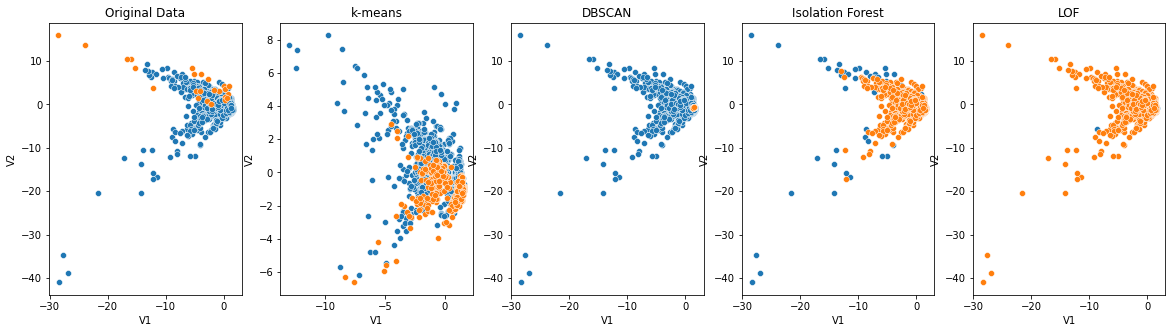

In [6]:
y_pred_kmeans = best_kmeans.predict(X_test_scaled)
y_pred_dbscan = best_dbscan.fit_predict(X_test_scaled)
y_pred_iforest = best_isolation_forest.predict(X_test_scaled)
y_pred_lof = best_lof.fit_predict(X_test_scaled)
#y_pred_ocsvm = best_ocsvm.predict(X_test_encoded)

fig, axs = plt.subplots(ncols=5, figsize=(20,5))
sns.scatterplot(x=X_test[y_test==0]["V1"], y=X_test[y_test==0]["V2"], ax=axs[0])
sns.scatterplot(x=X_test[y_test==1]["V1"], y=X_test[y_test==1]["V2"], ax=axs[0])
axs[0].set_title("Original Data")

sns.scatterplot(x=X_test[y_pred_kmeans==0]["V1"], y=X_test[y_pred_kmeans==0]["V2"], ax=axs[1])
sns.scatterplot(x=X_test[y_pred_kmeans==1]["V1"], y=X_test[y_pred_kmeans==1]["V2"], ax=axs[1])
axs[1].set_title("k-means")

sns.scatterplot(x=X_test[y_pred_dbscan==-1]["V1"], y=X_test[y_pred_dbscan==-1]["V2"], ax=axs[2])
sns.scatterplot(x=X_test[y_pred_dbscan==0]["V1"], y=X_test[y_pred_dbscan==0]["V2"], ax=axs[2])
axs[2].set_title("DBSCAN")

sns.scatterplot(x=X_test[y_pred_iforest==-1]["V1"], y=X_test[y_pred_iforest==-1]["V2"], ax=axs[3])
sns.scatterplot(x=X_test[y_pred_iforest==1]["V1"], y=X_test[y_pred_iforest==1]["V2"], ax=axs[3])
axs[3].set_title("Isolation Forest")

sns.scatterplot(x=X_test[y_pred_lof==-1]["V1"], y=X_test[y_pred_lof==-1]["V2"], ax=axs[4])
sns.scatterplot(x=X_test[y_pred_lof==1]["V1"], y=X_test[y_pred_lof==1]["V2"], ax=axs[4])
axs[4].set_title("LOF")

plt.show()